##Manuela Montoya Gonzalez

## Last homework
Solve the same equations using `scipy.integrate.odeint` and `scipy.integrate.solve_ivp`

$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

for the parameters:

* $\sigma =10$
* $\rho=28$
* $\beta=8/3$

lets set intial conditions:

* x(0)=1.0
* y(0)=1.0
* z(0)=1.0

Compare the results. Seeing anything strange?

excelente,la integracion termino con exito
The solver successfully reached the end of the integration interval.


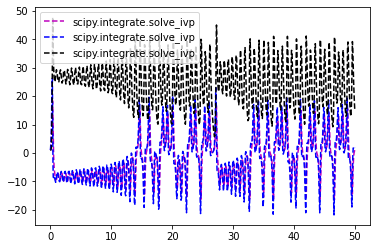

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Reescribimos la funcion para respetar el orden usado por solve_ivp
def lorenz1(t,y):
    dydx = np.array([0.0,
                     0.0,
                     0.0])
    
    dydx[0] = sigma * (y[1] - y[0])
    dydx[1] = y[0] * (rho - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - beta * y[2]
    return dydx

# Lorenz paramters and initial conditions.
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

x0 = 0.0
y0 = np.array([1.0,
               1.0,
               1.0])
h = 0.01
#Suponemos un intervalo
t_span=(x0,50.0)

# Integrate the Lorenz equations.
soli = solve_ivp(lorenz1, t_span, y0)
#print(type(soli))
#print(soli.t)
#print(soli.y[0])
if soli.success == True:
  print('excelente,la integracion termino con exito')

#Graficamos
#Grafiqué todo junto 
fig,ax = plt.subplots(1,1)
print(soli.message)
ax.plot(soli.t,soli.y[0],'--m',label = 'scipy.integrate.solve_ivp')
ax.plot(soli.t,soli.y[1],'--b',label = 'scipy.integrate.solve_ivp')
ax.plot(soli.t,soli.y[2],'--k',label = 'scipy.integrate.solve_ivp')
ax.legend()


[[ 1.          1.          1.        ]
 [ 1.01256574  1.25992001  0.98489104]
 [ 1.04882146  1.52400084  0.97311434]
 ...
 [ 2.7932894   4.85175476 12.67297902]
 [ 3.00809479  5.24847898 12.48401244]
 [ 3.24192825  5.68109132 12.32397939]]


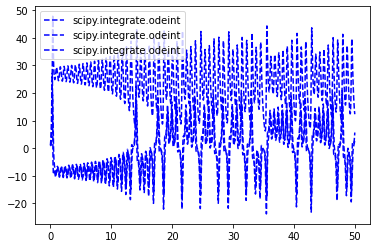

In [ ]:
#First part using scipy.integrate.odeint 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# now the function, invertida para odeint
def lorenz(y, x):
    dydx = np.array([0.0,
                     0.0,
                     0.0])
    
    dydx[0] = sigma * (y[1] - y[0])
    dydx[1] = y[0] * (rho - y[2]) - y[1]
    dydx[2] = y[0] * y[1] - beta * y[2]
    return dydx

#Inicial values
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

x0 = 0.0
y0 = np.array([1.0,
               1.0,
               1.0])
h = 0.01
npoints=np.arange(x0,50.0,h)

sol = odeint(lorenz,y0, npoints)

print(sol)

#Graficamos
fig,ax = plt.subplots(1,1)
ax.plot(npoints,sol,'--b',label = 'scipy.integrate.odeint')
ax.legend()
